# Setup

In [1]:
%reload_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [3]:
SYS_PROJECT_DIR  = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr'
SYS_SRC_DIR  = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr'
# SYS_CONFIG_DIR  = '/content/gdrive/MyDrive/Colab Notebooks/deoptima/deoptima/deoptima/config'
# SYS_RUNTIME_DIR = '/content/gdrive/MyDrive/Colab Notebooks/deoptima/deoptima/runtime'

In [4]:
import os
import pandas as pd
import shutil

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.copy_on_write = True

# Installs

In [5]:
import os

requirements = """
python-dotenv==1.0.1
"""

requirements_path = os.path.join(SYS_SRC_DIR, 'requirements.txt')
with open(requirements_path, 'w') as f:
    f.write(requirements)

22

In [6]:
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"

In [7]:
import os
requirements_path = os.path.join(SYS_SRC_DIR, 'requirements.txt')
!pip install -q -r '{requirements_path}'

In [8]:
import sys
import os

if SYS_PROJECT_DIR not in sys.path:
    sys.path.append(SYS_PROJECT_DIR)

In [9]:
os.chdir(SYS_SRC_DIR)
from dotenv import load_dotenv
_ = load_dotenv('.env')
from dotenv import dotenv_values
env_from_file = dotenv_values('.env')
# env_from_file

# Evaluation Summary

## VIDEO_IDS

In [10]:
VIDEO_IDS = {
    "legal_document_01": "m-z-0194c270-bbfb-7dd2-aaec-62d909b97b32",
    "react_05": "m-z-0194c272-dd5c-7a62-8d86-a47e3c4e4670",
    "react_03": "m-z-0194c27c-894f-7e11-beac-6da09861f796",
    "css_02": "m-z-0194c27c-aebe-75d0-812f-06fbeb60b7d6",
    "react_01": "m-z-0194c27c-d107-7030-b990-0b5cc62f514a",
    "stock_market_ticker_01": "m-z-0194c27c-f30c-7803-b2ca-8f1026c940a2",
    "CNBC_01": "m-z-0194c27d-10a6-7531-9aaf-d7940a9469b1",
    "legal_document_03": "m-z-0194c27d-2e68-7e63-b44e-5abbe36938df",
    "new_paper_reading_04": "m-z-0194c27d-50bc-7c22-9d73-3756717196d5",
    "white_board_music_theory_01": "m-z-0194c27d-71a3-72c2-9710-773f6f6b80b5",
    "handwriting_analysis_02": "m-z-0194c27d-98b2-75c0-afff-77c8b24515bc",
    "react_animation_02": "m-z-0194c27d-b22a-7982-a796-e332a82d5596",
    "film_analysis_02": "m-z-0194c27d-d8d7-73b3-b136-1f4af218cb12",
    "billboard_pederstian": "m-z-0194c27d-f7f8-7d03-b053-7f0e75498476",
    "CNBC_04": "m-z-0194c27e-19c0-7270-9b2e-d467ff30fd1a",
    "cursive_writing_whiteboard": "m-z-0194c27e-408d-73b1-b550-5bf76fb0339d",
    "legal_document_05": "m-z-0194c27e-5dcf-73b3-a129-e9217d8e611f",
    "react_animation_01": "m-z-0194c27e-99ce-7fc0-867f-9bc8358d3388",
    "stock_market_ticker_02": "m-z-0194c27e-fe96-7403-a0d8-17a033e5f595",
    "walk_sign": "m-z-0194c27f-2095-76a3-bc26-96f1167e2526",
    "white_board_music_theory_02": "m-z-0194c27f-60d8-74e2-b777-bfed7d9b49d4",
    "handwriting_analysis_01": "m-z-0194c27f-836c-72f2-8c43-2eeedd6dbc2b",
    "css_01": "m-z-0194c27f-a202-7f00-80a9-3bb8a3bf257d",
    "cursive_handwriting_01": "m-z-0194c27f-e828-7f43-be2e-7fa19bc39dd4",
    "calculus_limits_01": "m-z-0194c280-0778-7b52-8268-c6f1d00dbd52",
}

## input data - gpt-4o

In [11]:
model_id = 'gpt-4o'
evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/gpt_results/gpt-4o'

In [12]:
run_ids = {
    'ocr_2025-03-09_14-52-43': VIDEO_IDS['legal_document_01'],
    'ocr_2025-03-10_00-37-25': VIDEO_IDS['react_05'],
    'ocr_2025-03-10_01-23-59': VIDEO_IDS['react_03'],
    'ocr_2025-03-10_02-06-01': VIDEO_IDS['css_02'],
    'ocr_2025-03-19_14-43-37': VIDEO_IDS['react_01'],
    'ocr_2025-03-19_14-50-19': VIDEO_IDS['stock_market_ticker_01'],
    # ? : VIDEO_IDS['CNBC_01'],
    # ? : VIDEO_IDS['legal_document_03'],
    # ? : VIDEO_IDS['new_paper_reading_04'],
    # ? : VIDEO_IDS['white_board_music_theory_01'],
    # ? : VIDEO_IDS['handwriting_analysis_02'],
    # ? : VIDEO_IDS['react_animation_02'],
    # ? : VIDEO_IDS['film_analysis_02'],
    # ? : VIDEO_IDS['billboard_pederstian'],
    # ? : VIDEO_IDS['CNBC_04'],
    # ? : VIDEO_IDS['cursive_writing_whiteboard'],
    # ? : VIDEO_IDS['legal_document_05'],
    # ? : VIDEO_IDS['react_animation_01'],
    # ? : VIDEO_IDS['stock_market_ticker_02'],
    # ? : VIDEO_IDS['walk_sign'],
    # ? : VIDEO_IDS['white_board_music_theory_02'],
    # ? : VIDEO_IDS['handwriting_analysis_01'],
    # ? : VIDEO_IDS['css_01'],
    # ? : VIDEO_IDS['cursive_handwriting_01'],
    # ? : VIDEO_IDS['calculus_limits_01'],
}


## input data - mistral-ocr-latest

In [ ]:
# model_id = 'mistral-ocr-latest'

In [ ]:
# evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/mistral_results/mistral-ocr-latest'
# run_ids = {
#     'ocr_2025-03-09_21-42-02': VIDEO_IDS['legal_document_01'],
#     'ocr_2025-03-10_00-00-47': VIDEO_IDS['react_05'],
#     'ocr_2025-03-10_00-22-59': VIDEO_IDS['react_03'],
#     'ocr_2025-03-10_00-34-05': VIDEO_IDS['css_02'],
#     'ocr_2025-03-10_00-41-53': VIDEO_IDS['react_01'],
# }

## input data - gemini-2.0-flash

In [11]:
model_id = 'gemini-2.0-flash'
evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/gemini_results/gemini-2.0-flash'

In [12]:
run_ids = {
    'ocr_2025-03-11_00-59-10': VIDEO_IDS['legal_document_01'],
    'ocr_2025-03-17_00-49-02' : VIDEO_IDS['react_05'],
    'ocr_2025-03-17_00-53-59' : VIDEO_IDS['react_03'],
    'ocr_2025-03-17_00-55-12' : VIDEO_IDS['css_02'],
    'ocr_2025-03-17_01-00-20' : VIDEO_IDS['react_01'],
    'ocr_2025-03-17_01-02-32' : VIDEO_IDS['stock_market_ticker_01'],
    # ? : VIDEO_IDS['CNBC_01'],
    # ? : VIDEO_IDS['legal_document_03'],
    # ? : VIDEO_IDS['new_paper_reading_04'],
    # ? : VIDEO_IDS['white_board_music_theory_01'],
    # ? : VIDEO_IDS['handwriting_analysis_02'],
    # ? : VIDEO_IDS['react_animation_02'],
    # ? : VIDEO_IDS['film_analysis_02'],
    # ? : VIDEO_IDS['billboard_pederstian'],
    # ? : VIDEO_IDS['CNBC_04'],
    # ? : VIDEO_IDS['cursive_writing_whiteboard'],
    # ? : VIDEO_IDS['legal_document_05'],
    # ? : VIDEO_IDS['react_animation_01'],
    # ? : VIDEO_IDS['stock_market_ticker_02'],
    # ? : VIDEO_IDS['walk_sign'],
    # ? : VIDEO_IDS['white_board_music_theory_02'],
    # ? : VIDEO_IDS['handwriting_analysis_01'],
    # ? : VIDEO_IDS['css_01'],
    # ? : VIDEO_IDS['cursive_handwriting_01'],
    # ? : VIDEO_IDS['calculus_limits_01'],
}

## Prepare evaluation

In [22]:
# model_id = 'gpt-4o'
# evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/gpt_results/gpt-4o'
model_id = 'gemini-2.0-flash'
evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/gemini_results/gemini-2.0-flash'

In [23]:
import os
import numpy as np
import pandas as pd

evaluation_df = pd.DataFrame() ; evaluation_summary_vid = []

for k, v in run_ids.items():
  evaluation_path = os.path.join(evaluation_model_dir, k, 'evaluations', v + '.json')
  i_df = pd.read_json(evaluation_path)
  i_summary = {
              "model": model_id,
              "vid": v,
              "total_frames": i_df.shape[0],
              "avg_cer": np.round(np.average(i_df['cer']),4),
              "avg_wer": np.round(np.average(i_df['wer']),4),
              "avg_acc": np.round(np.average(i_df['accuracy']),2),
              "avg_order_agnostic_acc": np.round(np.average(i_df['order_agnostic_accuray']),2),
              "avg_processing_time": np.round(np.average(i_df['processing_time']),3),
              }
  evaluation_summary_vid.append(i_summary)
  evaluation_df = pd.concat([evaluation_df, i_df], axis = 0)

In [24]:
import numpy as np

evaluation_summary_model = {
    "model": model_id,
    "total_vids": len(run_ids.values()),
    "total_frames": evaluation_df.shape[0],
    "avg_cer": np.round(np.average(evaluation_df['cer']),4),
    "avg_wer": np.round(np.average(evaluation_df['wer']),4),
    "avg_acc": np.round(np.average(evaluation_df['accuracy']),2),
    "avg_order_agnostic_acc": np.round(np.average(evaluation_df['order_agnostic_accuray']),2),
    "avg_processing_time": np.round(np.average(evaluation_df['processing_time']),3),
    }

evaluation_summary_model

{'model': 'gemini-2.0-flash',
 'total_vids': 6,
 'total_frames': 243,
 'avg_cer': np.float64(0.277),
 'avg_wer': np.float64(0.3601),
 'avg_acc': np.float64(72.3),
 'avg_order_agnostic_acc': np.float64(92.08),
 'avg_processing_time': np.float64(1.619)}

In [25]:
import json

evaluation_summary_path = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/evaluation'

with open(os.path.join(evaluation_summary_path,f"evaluation_df_{model_id}.csv"), "w") as file:
    evaluation_df.to_csv(file, index=False)

with open(os.path.join(evaluation_summary_path,f"summary_data_{model_id}_vid.json"), "w") as json_file:
    json.dump(evaluation_summary_vid, json_file, indent=4)

with open(os.path.join(evaluation_summary_path,f"summary_data_{model_id}.json"), "w") as json_file:
    json.dump(evaluation_summary_model, json_file, indent=4)

# Evaluation Viz

In [24]:
model_ids = ['gpt-4o', 'gemini-2.0-flash']

In [25]:
# from ocr.utils import plot_evaluation_heatmap_1
# plot_evaluation_heatmap_1(evaluation_summary_path, model_ids)

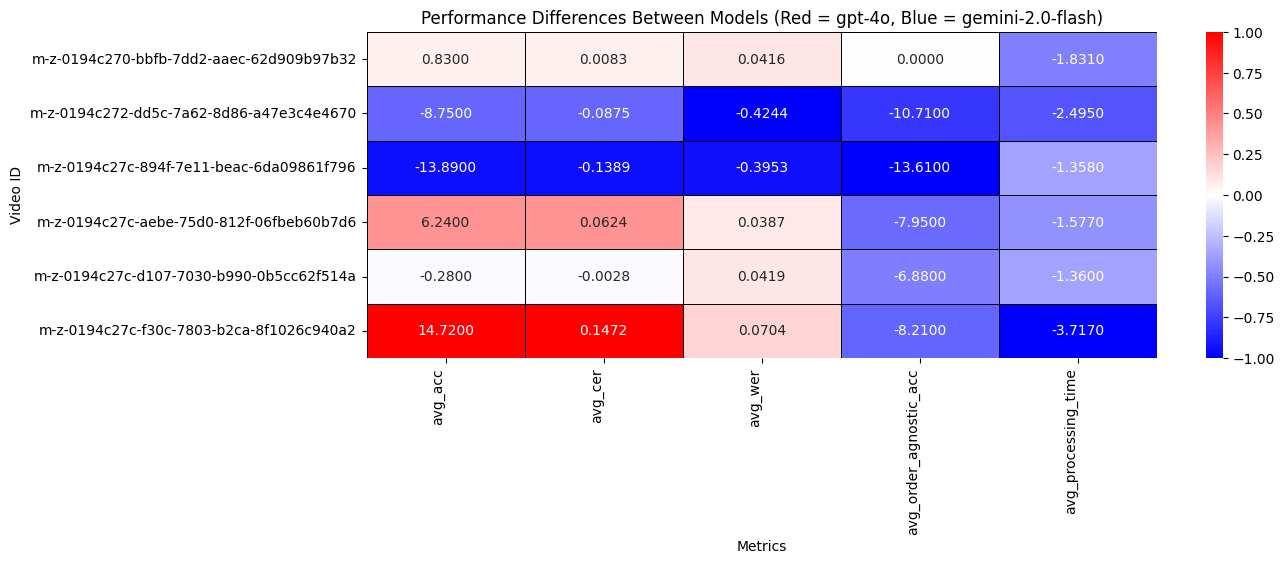

In [27]:
from ocr.utils import plot_evaluation_heatmap_2
plot_evaluation_heatmap_2(evaluation_summary_path, model_ids)

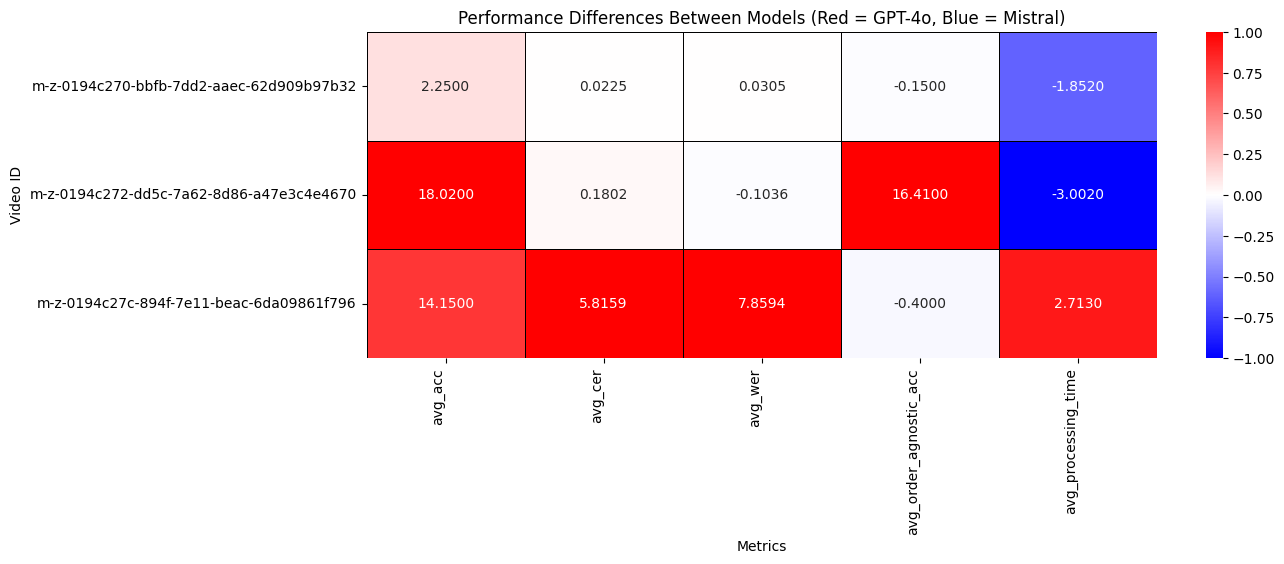

In [30]:
import json
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define the path to the evaluation summaries and the models to compare
evaluation_summary_path = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/evaluation'
model_ids = ['gpt-4o', 'mistral-ocr-latest']

# Define metric direction: 1 means higher is better, -1 means lower is better
metric_directions = {
    'avg_acc': 1,  # Higher accuracy is better
    'avg_cer': -1,  # Lower Character Error Rate (CER) is better
    'avg_wer': -1,  # Lower Word Error Rate (WER) is better
    'avg_order_agnostic_acc': 1,  # Higher order-agnostic accuracy is better
    'avg_processing_time': -1  # Lower processing time is better
}

# Read all JSON files into a dictionary of DataFrames
dfs = {}
for model_id in model_ids:
    with open(os.path.join(evaluation_summary_path, f"summary_data_{model_id}_vid.json"), 'r') as f:
        data = json.load(f)
        df = pd.DataFrame(data)
        df = df[['model', 'vid'] + list(metric_directions.keys())]
        dfs[model_id] = df

# Merge DataFrames on 'vid'
merged_df = pd.merge(dfs[model_ids[0]], dfs[model_ids[1]], on='vid', suffixes=('_gpt4o', '_mistral'))

# Calculate differences based on metric direction
for metric, direction in metric_directions.items():
    if direction == 1:  # Higher is better
        merged_df[f'{metric}_diff'] = merged_df[f'{metric}_gpt4o'] - merged_df[f'{metric}_mistral']
    else:  # Lower is better
        merged_df[f'{metric}_diff'] = merged_df[f'{metric}_mistral'] - merged_df[f'{metric}_gpt4o']

# Apply Max Absolute Scaling
scaled_df = merged_df[[f'{metric}_diff' for metric in metric_directions]].apply(lambda x: x / np.max(np.abs(x)))

# Create a DataFrame for annotations with original values
annotations_df = merged_df[[f'{metric}_diff' for metric in metric_directions]].map(lambda x: f'{x:.4f}')

# Custom colormap (red = GPT-4o better, blue = Mistral better)
cmap_red_blue = mcolors.LinearSegmentedColormap.from_list("red_blue", ["blue", "white", "red"])

# Set up the matplotlib figure with increased size
plt.figure(figsize=(14, len(merged_df) * 2))

# Plot the heatmap
sns.heatmap(
    scaled_df,
    cmap=cmap_red_blue,
    center=0,
    cbar=True,
    annot=annotations_df,
    fmt='',
    linewidths=0.5,
    linecolor='black',
    xticklabels=[metric for metric in metric_directions],
    yticklabels=merged_df['vid']
)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90, ha='right')

# Set labels
plt.xlabel('Metrics')
plt.ylabel('Video ID')
plt.title('Performance Differences Between Models (Red = GPT-4o, Blue = Mistral)')

# Adjust layout with specific padding
plt.tight_layout(pad=2.0, h_pad=2.0, w_pad=2.0)
plt.show();

# Case Evaluation

In [120]:
model_id = 'gemini-2.0-flash'

# evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/gpt_results/gpt-4o'
# evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/mistral_results/mistral-ocr-latest'
evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/gemini_results/gemini-2.0-flash'

In [135]:
import pandas as pd

with open(os.path.join(evaluation_summary_path,f"evaluation_df_{model_id}.csv"), "r") as file:
    evaluation_df = pd.read_csv(file)

In [136]:
evaluation_df['image'] = evaluation_df['image'].apply(lambda x: eval(x)[0])
evaluation_df.columns = ['video_id','scene_start','scene_end','image','actual','predicted','cer','wer','accuracy','order_agnostic_accuracy','processing_time']

evaluation_df = evaluation_df.astype({'scene_end': int})

precision_dict = {'scene_end':0, 'cer': 4, 'wer': 4, 'accuracy': 2, 	'order_agnostic_accuracy': 2, 'processing_time': 3}
evaluation_df[list(precision_dict)] = evaluation_df[list(precision_dict)].round(precision_dict)

In [105]:
# # filter video
# video_id = 'm-z-0194c27c-d107-7030-b990-0b5cc62f514a'
# evaluation_df = evaluation_df.query("video_id == @video_id")

# # worst case
# metric = "accuracy"
# lower_bound = 40 ; upper_bound = 60
# evaluation_df = evaluation_df.query(f'{metric}.between(@lower_bound, @upper_bound)')
# evaluation_df_sorted = evaluation_df.sort_values(by='accuracy', ascending=True)

# # middle case
# metric = "accuracy"
# lower_bound = 85 ; upper_bound = 90
# evaluation_df = evaluation_df.query(f'{metric}.between(@lower_bound, @upper_bound)')
# evaluation_df_sorted = evaluation_df.sort_values(by='accuracy', ascending=True)

# best case
metric = "accuracy"
lower_bound = 99 ; upper_bound = 100
evaluation_df = evaluation_df.query(f'{metric}.between(@lower_bound, @upper_bound)')
evaluation_df_sorted = evaluation_df.sort_values(by='accuracy', ascending=True)

# Select the top 5 rows
evaluation_df_top = evaluation_df_sorted.head(5)

In [106]:
evaluation_df_top

,video_id,scene_start,scene_end,image,actual,predicted,cer,wer,accuracy,order_agnostic_accuracy,processing_time
81,m-z-0194c272-dd5c-7a62-8d86-a47e3c4e4670,32,33,https://storage.videodb.io/media/u-0e58db00-6548-4d3c-b8c1-4ddddc072787/m-z-0194c272-dd5c-7a62-8d86-a47e3c4e4670/frames/frm-scn-tt1sff1-32.0-33.0-32.5/img-bf729858-2465-4046-8023-7998bf3d1d9b.png,"function Article() { return ( <div> <link rel=""stylesheet"" href=""styles/article.css"" precedence=""default"" /> <article>...</article> <Comments /> </div> ) } function Comments() { return ( <Suspense fallback={<Loading />}> <link rel=""stylesheet"" href=""/styles/comments.css"" precedence=""default"" /> <link rel=""stylesheet"" href=""/styles/button.css"" precedence=""high"" /> <ul>...</ul> </Suspense> ) } <html> <head> <link rel=""stylesheet"" href=""/styles/button.css"" /> <link rel=""stylesheet"" href=""/styles/article.css"" /> <link rel=""stylesheet"" href=""/styles/comments.css"" /> </head> <body> <div> <article>...</article> </div> </body> </html>","function Article() { return ( <div> <link rel=""stylesheet"" href=""/styles/article.css"" precedence=""default"" /> <article>...</article> <Comments /> </div> ) } function Comments() { return ( <Suspense fallback={<Loading />}> <link rel=""stylesheet"" href=""/styles/comments.css"" precedence=""default"" /> <link rel=""stylesheet"" href=""/styles/button.css"" precedence=""high"" /> <>...</ </Suspense> ) } <html> <head> <link rel=""stylesheet"" href=""/styles/button.css"" /> <link rel=""stylesheet"" href=""/styles/article.css"" /> <link rel=""stylesheet"" href=""/styles/comments.css"" /> </head> <body> <div> <article>...</article> </div> </body> </html>",0.0095,0.0333,99.05,99.21,2.565
95,m-z-0194c272-dd5c-7a62-8d86-a47e3c4e4670,46,47,https://storage.videodb.io/media/u-0e58db00-6548-4d3c-b8c1-4ddddc072787/m-z-0194c272-dd5c-7a62-8d86-a47e3c4e4670/frames/frm-scn-tt1sff1-46.0-47.0-46.5/img-c1a65b2a-28f0-4d3f-ad45-51fd48315dab.png,"function Article() { return ( <div> <link rel=""stylesheet"" href=""styles/article.css"" precedence=""default"" /> <article>...</article> <Comments /> </div> ) } function Comments() { return ( <Suspense fallback={<Loading />}> <link rel=""stylesheet"" href=""/styles/comments.css"" precedence=""default"" /> <link rel=""stylesheet"" href=""/styles/button.css"" precedence=""high"" /> <ul>...</ul> </Suspense> ) } <html> <head> <link rel=""stylesheet"" href=""/styles/button.css"" /> <link rel=""stylesheet"" href=""/styles/article.css"" /> <link rel=""stylesheet"" href=""/styles/comments.css"" /> </head> <body> <div> <article>...</article> </div> </body> </html>","function Article() { return ( <div> <link rel=""stylesheet"" href=""/styles/article.css"" precedence=""default"" /> <article>...</article> <Comments /> </div> ) } function Comments() { return ( <Suspense fallback={<Loading />}> <link rel=""stylesheet"" href=""/styles/comments.css"" precedence=""default"" /> <link rel=""stylesheet"" href=""/styles/button.css"" precedence=""high"" /> <1>...</ </Suspense> ) } <html> <head> <link rel=""stylesheet"" href=""/styles/button.css"" /> <link rel=""stylesheet"" href=""/styles/article.css"" /> <link rel=""stylesheet"" href=""/styles/comments.css"" /> </head> <body> <div> <article>...</article> </div> </body> </html>",0.0095,0.0333,99.05,99.21,1.930
97,m-z-0194c272-dd5c-7a62-8d86-a47e3c4e4670,48,49,https://storage.videodb.io/media/u-0e58db00-6548-4d3c-b8c1-4ddddc072787/m-z-0194c272-dd5c-7a62-8d86-a47e3c4e4670/frames/frm-scn-tt1sff1-48.0-49.0-48.5/img-aca9a2da-694f-41d7-b825-ca2793bb5def.png,"function Article() { return ( <div> <link rel=""stylesheet"" href=""styles/article.css"" precedence=""default"" /> <article>...</article> <Comments /> </div> ) } function Comments() { return ( <Suspense fallback={<Loading />}> <link rel=""stylesheet"" href=""/styles/comments.css"" precedence=""default"" /> <link rel=""stylesheet"" href=""/styles/button.css"" precedence=""high"" /> <ul>...</ul> </Suspense> ) } <html> <hea

In [108]:
import pandas as pd
import difflib
import html  # Import the html module for escaping special characters

def highlight_differences(actual, predicted):
    """Highlight character-level differences between actual and predicted strings,
    ensuring that any HTML special characters are escaped."""
    # Perform the diff on the raw strings
    diff = difflib.ndiff(actual, predicted)
    highlighted_actual = ""
    highlighted_predicted = ""

    for d in diff:
        # Escape the character to ensure it's safe for HTML
        char = html.escape(d[2])
        if d.startswith(" "):  # Matching character
            highlighted_actual += char
            highlighted_predicted += char
        elif d.startswith("-"):  # Character in actual but not in predicted
            highlighted_actual += f"<span style='color:#dc3545; font-weight:bold;'>{char}</span>"
        elif d.startswith("+"):  # Character in predicted but not in actual
            highlighted_predicted += f"<span style='color:#28a745; font-weight:bold;'>{char}</span>"

    return highlighted_actual, highlighted_predicted

def generate_html_table(df):
    html_output = "<table border='1' style='border-collapse: collapse; width: 100%;'>"

    for _, row in df.iterrows():
        # General Information Section
        html_output += "<tr style='background-color:#f2f2f2;'><th colspan='3'>General Information</th></tr>"
        html_output += "<tr><th>Video ID</th><th>Scene Start</th><th>Scene End</th></tr>"
        # It is also a good idea to escape other text fields if they might contain special characters.
        html_output += (
            f"<tr><td>{html.escape(str(row['video_id']))}</td>"
            f"<td>{html.escape(str(row['scene_start']))}</td>"
            f"<td>{html.escape(str(row['scene_end']))}</td></tr>"
        )

        # Image & Predictions Section
        html_output += "<tr style='background-color:#f2f2f2;'><th colspan='3'>Prediction Information</th></tr>"
        html_output += "<tr><th>Image</th><th>Actual</th><th>Predicted</th></tr>"

        # Get highlighted differences (which already escapes special characters)
        highlighted_actual, highlighted_predicted = highlight_differences(row['actual'], row['predicted'])

        html_output += (
            f"<tr><td><img src='{html.escape(row['image'])}' style='max-width:500px; max-height:400px;'></td>"
            f"<td>{highlighted_actual}</td>"
            f"<td>{highlighted_predicted}</td></tr>"
        )

        # Metrics Section
        html_output += "<tr style='background-color:#f2f2f2;'><th colspan='3'>Metrics</th></tr>"
        html_output += "<tr><th>Accuracy</th><th>cer</th><th>wer</th></tr>"
        html_output += (
            f"<tr><td>{html.escape(str(row['accuracy']))}</td>"
            f"<td>{html.escape(str(row['cer']))}</td>"
            f"<td>{html.escape(str(row['wer']))}</td></tr>"
        )

        # Separator Row for readability
        html_output += "<tr><td colspan='3' style='background-color:lightgray; height:5px;'></td></tr>"

    html_output += "</table>"
    return html_output

from IPython.core.display import display, HTML
# Assuming evaluation_df_top is defined and is a DataFrame with the required columns
html_table = generate_html_table(evaluation_df_top.head(3))
display(HTML(html_table))


# Sleep

In [ ]:
# import time
# time.sleep(30000)